In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.measure
import skimage.morphology

from google.colab import files
uploaded = files.upload()

class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def getX(self):
        return self.x
    def getY(self):
        return self.y
 


Saving 2.png to 2 (5).png


In [2]:
def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))
 
def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1),  Point(0, 1), Point(-1, 1), Point(-1, 0)]
    else:
        connects = [ Point(0, -1),  Point(1, 0),Point(0, 1), Point(-1, 0)]
    return connects
 
def regionGrow(img,seeds,thresh,p = 1):
    height, width = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
    label = 1
    connects = selectConnects(p)
    while(len(seedList)>0):
        currentPoint = seedList.pop(0)
 
        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= width:
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    return seedMark

def vdk_perimeter(convert_matrix_copy1):
    (w, h) = convert_matrix_copy1.shape
    data = np.zeros((w + 2, h + 2), dtype=convert_matrix_copy1.dtype)
    data[1:-1, 1:-1] = convert_matrix_copy1
    data = skimage.morphology.binary_dilation(data)
    newdata = np.copy(data)
    for i in range(1, w + 1):
        for j in range(1, h + 1):
            cond = data[i, j] == data[i, j + 1] and \
                   data[i, j] == data[i, j - 1] and \
                   data[i, j] == data[i + 1, j] and \
                   data[i, j] == data[i - 1, j]
            if cond:
                newdata[i, j] = 0

    return np.count_nonzero(newdata)

In [3]:

img1 = cv2.imread('2.png')
img = cv2.imread('2.png',0)
img_eq = cv2.equalizeHist(img)

height1, width1 = img_eq.shape
h1 = int(height1/2)
w1 = int(width1/2)
#seeds = (h1, w1)

seed1 = [Point(h1, w1), Point(h1+2, w1+2), Point(h1+3, w1+3), Point(h1+4, w1+4), Point(h1+5, w1+5), Point(h1+6, w1+6), Point(h1+7, w1+7), Point(h1+8, w1+8)]
seed2 = [Point(h1-24, w1-24), Point(h1-20, w1-20), Point(h1-36, w1-36), Point(h1-14, w1-14), Point(h1-10, w1-10), Point(h1-6, w1-6), Point(h1-7, w1-7), Point(h1-8, w1-8), Point(h1-5, w1-5)]
seed3 = [Point(h1, -w1), Point(h1+5, w1-5), Point(h1+5, w1-8), Point(h1+2, w1-8), Point(h1+2, w1+8)]
seed4 = [Point(h1-5, w1+5), Point(h1-5, w1+8), Point(h1+5, w1-5), Point(h1+5, w1-8),Point(h1-5, w1-2), Point(h1-5, w1-5), Point(h1-5, w1-8) ]
seed5 = [Point(h1-14, w1+5), Point(h1-14, w1+2), Point(h1-14, w1+1), Point(h1-14, w1+3), Point(h1-14, w1+4), Point(h1-10, w1+5), Point(h1-10, w1+2), Point(h1-10, w1+1), Point(h1-10, w1+3), Point(h1-10, w1+4)]
seed6 = [Point(h1+24, w1+24), Point(h1+20, w1+20), Point(h1+36, w1+36)]

seed7 = [Point(h1-15, w1+15), Point(h1-15, w1+18), Point(h1+15, w1-15), Point(h1+15, w1-18),Point(h1-15, w1-12), Point(h1-15, w1-15), Point(h1-15, w1-18) ]
seed8 = [Point(h1-24, w1+15), Point(h1-24, w1+12), Point(h1-24, w1+10), Point(h1-24, w1+13), Point(h1-24, w1+14), Point(h1-20, w1+15), Point(h1-20, w1+12), Point(h1-20, w1+10), Point(h1-20, w1+13), Point(h1-20, w1+14)]
seeds = seed1  + seed2 + seed3 + seed4 + seed5 + seed6 + seed7 + seed8
binaryImg = regionGrow(img_eq,seeds,4)

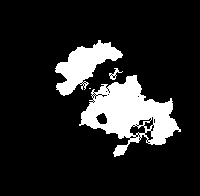

In [4]:
from PIL import Image
cm = Image.fromarray(binaryImg * 255)
cm = cm.convert('RGB')
cm

In [5]:
#running on columns
convert_matrix_copy = binaryImg.copy()
convert_matrix_copy.shape[1]
for column_index in range(0,convert_matrix_copy.shape[1]):
    count_one = 0
    index_one = []
    for row_index in range(0,len(convert_matrix_copy)):
        if(convert_matrix_copy[row_index][column_index] == 1):
            index_one.append(row_index)
            count_one += 1
        if(count_one > 1):
            start_index = index_one[0]
            end_index = index_one[len(index_one)-1]
            for i in range(start_index,end_index):
                convert_matrix_copy[i][column_index] = 1


In [6]:
#running on rows
convert_matrix_copy1 = convert_matrix_copy.copy()
for row_index in range(len(convert_matrix_copy1)):
    count_one = 0
    index_one = []
    for element_index in range(0,len(convert_matrix_copy1[row_index])-1):
        if(convert_matrix_copy1[row_index][element_index] == 1):
            index_one.append(element_index)
            count_one += 1
        if(count_one > 1):
            start_index = index_one[0]
            end_index = index_one[len(index_one)-1]
            for i in range(start_index,end_index):
                convert_matrix_copy1[row_index][i] = 1


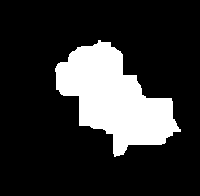

In [7]:
from PIL import Image
cm = Image.fromarray(convert_matrix_copy1 * 255)
cm = cm.convert('RGB')
cm

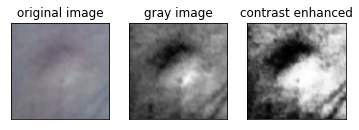

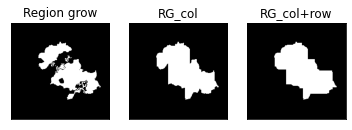

7597 313


In [8]:
plt.subplot(131),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('original image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img, cmap='gray')
plt.title('gray image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_eq, cmap = 'gray')
plt.title('contrast enhanced'), plt.xticks([]), plt.yticks([])
plt.show()


plt.subplot(131),plt.imshow(binaryImg, cmap='gray')
plt.title('Region grow'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(convert_matrix_copy, cmap='gray')
plt.title('RG_col'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(convert_matrix_copy1, cmap = 'gray')
plt.title('RG_col+row'), plt.xticks([]), plt.yticks([])
plt.show()

label_img = skimage.measure.label(convert_matrix_copy1)
regions = skimage.measure.regionprops(label_img)

for props in regions:
    print (props.area, vdk_perimeter(props.convex_image))